In [5]:
from pymc import DiscreteUniform, Exponential, deterministic, Poisson, Uniform
import numpy as np

In [6]:
disasters_array =   \
     np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [7]:
switchpoint = DiscreteUniform('switchpoint', lower=0, upper=110, doc='Switchpoint[year]')

In [8]:
early_mean = Exponential('early_mean', beta=1.)
late_mean = Exponential('late_mean', beta=1.)

In [9]:
@deterministic(plot=False)
def rate(s=switchpoint, e=early_mean, l=late_mean):
    ''' Concatenate Poisson means '''
    out = np.empty(len(disasters_array))
    out[:s] = e
    out[s:] = l
    return out

In [10]:
disasters = Poisson('disasters', mu=rate, value=disasters_array, observed=True)

In [11]:
switchpoint.parents

{'lower': 0, 'upper': 110}

In [12]:
disasters.parents

{'mu': <pymc.PyMCObjects.Deterministic 'rate' at 0x10bcdec88>}

In [13]:
rate.children

{<pymc.distributions.new_dist_class.<locals>.new_class 'disasters' at 0x10bcde390>}

In [14]:
disasters.value

array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1,
       4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3,
       0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
       0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [15]:
switchpoint.value

array(83)

In [16]:
early_mean.value

array(0.09059050745358949)

In [17]:
late_mean.value

array(1.1063437102035032)

In [18]:
switchpoint.logp

-4.709530201312334

In [19]:
disasters.logp

-551.9147492074002

In [20]:
early_mean.logp

-0.09059050745358949

In [21]:
late_mean.logp

-1.1063437102035032

In [22]:
rate.parents.value

{'e': array(0.09059050745358949),
 'l': array(1.1063437102035032),
 's': array(83)}

In [24]:
from pymc.examples import disaster_model
from pymc import MCMC
M = MCMC(disaster_model)

In [25]:
M.sample(iter=10000, burn=1000, thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 1.2 sec

In [26]:
M.trace('switchpoint')[:]

array([52, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 36, 36,
       44, 44, 37, 37, 37, 37, 45, 36, 36, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 35, 44, 44, 44, 44, 44, 43, 43,
       32, 45, 45, 37, 37, 37, 43, 43, 36, 36, 46, 43, 43, 36, 39, 42, 40,
       46, 36, 36, 44, 41, 39, 40, 42, 43, 43, 43, 39, 39, 39, 36, 40, 40,
       41, 40, 40, 41, 46

Plotting late_mean
Plotting switchpoint
Plotting early_mean


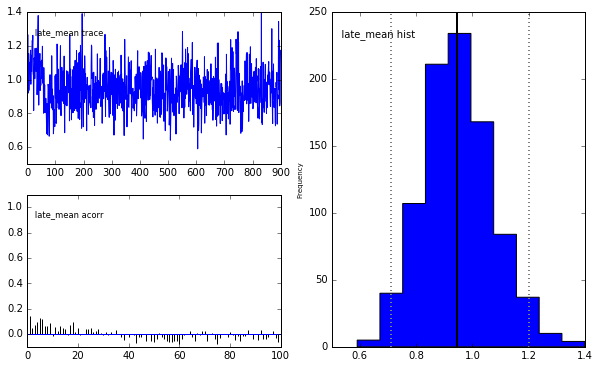

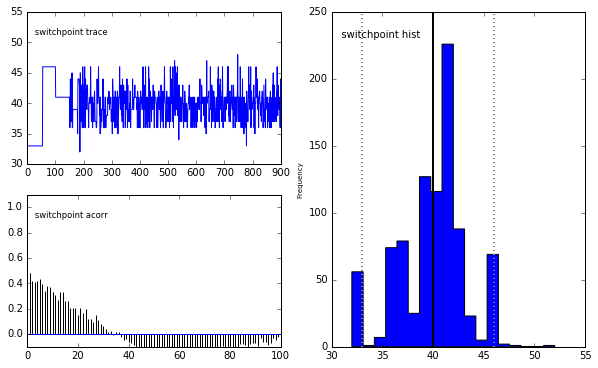

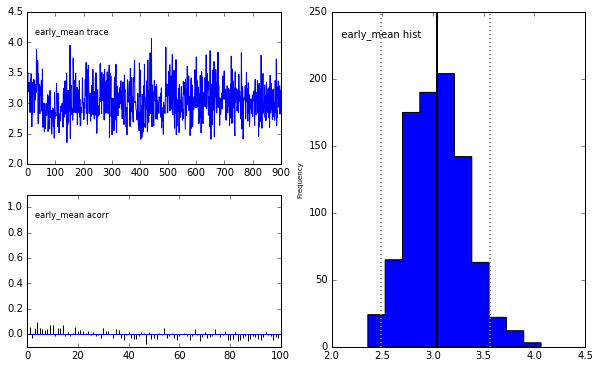

In [30]:
%matplotlib inline
from pymc.Matplot import plot
plot(M)

In [31]:
x = np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
2, 2, 3, 4, 2, 1, 3, None, 2, 1, 1, 1, 1, 3, 0, 0,
1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
3, 3, 1, None, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [32]:
masked_values = np.ma.masked_equal(x, value=None)
masked_values

masked_array(data = [4 5 4 0 1 4 3 4 0 6 3 3 4 0 2 6 3 3 5 4 5 3 1 4 4 1 5 5 3 4 2 5 2 2 3 4 2
 1 3 -- 2 1 1 1 1 3 0 0 1 0 1 1 0 0 3 1 0 3 2 2 0 1 1 1 0 1 0 1 0 0 0 2 1 0
 0 0 1 1 0 2 3 3 1 -- 2 1 1 1 1 2 4 2 0 0 1 4 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False],
       fill_value = ?)

In [33]:
from pymc import Poisson
disasters = Poisson('disasters', mu=rate, value=masked_values, observed=True)

In [42]:
switch = DiscreteUniform('switch', lower=0, upper=110)
early_mean = Exponential('early_mean', beta=1)
late_mean = Exponential('late_mean', beta=1)

@deterministic(plot=False)
def rate(s=switch, e=early_mean, l=late_mean):
    """Allocate appropriate mean to time series"""
    out = np.empty(len(disasters_array))
    out[:s] = e
    out[s:] = l
    return out


masked_values = np.ma.masked_array(disasters_array, mask=disasters_array==-999)

disasters = Poisson('disasters', mu=rate, value=masked_values, observed=True)
disaster_model.switchpoint = switch
disaster_model.early_mean = early_mean
disaster_model.late_mean = late_mean
disaster_model.rate = rate
disaster_model.disasters = disasters
M = MCMC(disaster_model)

In [41]:
%matplotlib inline
from pymc.Matplot import plot
plot(M)

KeyError: 'disasters'